# Sandbox

In [1]:
import arviz as az
import daft
from causalgraphicalmodels import CausalGraphicalModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89  # sets default credible interval used by arviz

<IPython.core.display.Javascript object>

In [3]:
def standardize(x):
    x = (x - np.mean(x)) / np.std(x)
    return x

<IPython.core.display.Javascript object>

/Users/blacar/opt/anaconda3/envs/stats_rethinking/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


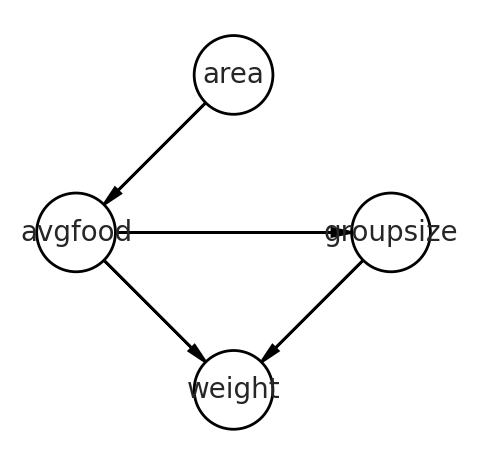

<IPython.core.display.Javascript object>

In [6]:
dag = CausalGraphicalModel(
    nodes=["area", "avgfood", "groupsize", "weight"],
    edges=[
        ("area", "avgfood"),
        ("avgfood", "groupsize"),
        ("avgfood", "weight"),
        ("groupsize", "weight"),
    ],
)
pgm = daft.PGM()
coordinates = {
    "area": (1, 1),
    "avgfood": (0, 0),
    "groupsize": (2, 0),
    "weight": (1, -1),
}
for node in dag.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in dag.dag.edges:
    pgm.add_edge(*edge)
pgm.render()

# Q1

In [8]:
check = [0,1,2,3,4,5]

<IPython.core.display.Javascript object>

In [9]:
check.insert(0, 99)
check

[99, 0, 1, 2, 3, 4, 5]

<IPython.core.display.Javascript object>

In [11]:
check.insert(3, 99)

<IPython.core.display.Javascript object>

In [12]:
check

[99, 0, 1, 99, 2, 3, 4, 5]

<IPython.core.display.Javascript object>

In [14]:
a = check.pop()

<IPython.core.display.Javascript object>

In [15]:
a

5

<IPython.core.display.Javascript object>

In [16]:
check

[99, 0, 1, 99, 2, 3, 4]

<IPython.core.display.Javascript object>

In [17]:
b = check.pop(0)

<IPython.core.display.Javascript object>

In [18]:
b, check

(99, [0, 1, 99, 2, 3, 4])

<IPython.core.display.Javascript object>

In [19]:
check.append(check.pop(0))

<IPython.core.display.Javascript object>

In [20]:
check

[1, 99, 2, 3, 4, 0]

<IPython.core.display.Javascript object>

In [21]:
check.append(check.pop(0))

<IPython.core.display.Javascript object>

In [22]:
check

[99, 2, 3, 4, 0, 1]

<IPython.core.display.Javascript object>

# Q2 Longest Common Prefix

In [28]:
strs = ["flower","flow","flight"]
res = ""
for i in range(len(strs[0])):
    if i == strs[1][i] == strs[2][i]:
        res += strs[0][i]
print(res)


IndexError: string index out of range

<IPython.core.display.Javascript object>

In [27]:
res = "" + "f"

res + "l"

'fl'

<IPython.core.display.Javascript object>

In [ ]:
ref_word = [(i, len(word)) for (i, word) in enumerate(strs)]

Appendix: Environment and system parameters

In [33]:
%watermark -n -u -v -iv -w

Last updated: Wed Jan 26 2022

Python implementation: CPython
Python version       : 3.8.6
IPython version      : 7.20.0

statsmodels: 0.12.2
scipy      : 1.6.0
pandas     : 1.2.1
arviz      : 0.11.1
daft       : 0.1.0
sys        : 3.8.6 | packaged by conda-forge | (default, Jan 25 2021, 23:22:12) 
[Clang 11.0.1 ]
numpy      : 1.20.1
matplotlib : 3.3.4
pymc3      : 3.11.0
seaborn    : 0.11.1

Watermark: 2.1.0



<IPython.core.display.Javascript object>